In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def float_to_int(x):
    return int(x)
def float_to_bool(x):
    if abs(x) > 0.0001:
        return True
    return False

# Data Cleaning

In [55]:
Car_Insur = pd.read_csv("Car_Insurance_Claim.csv")

# Clean data (totaly)
Car_Insur.drop(['Unnamed: 0', 'ID', 'POSTAL_CODE'], axis=1, inplace=True)
Car_Insur = Car_Insur.replace('none', np.nan)
Car_Insur = Car_Insur.dropna().reset_index(drop=True)

convert_col = ['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'VEHICLE_OWNERSHIP', 'MARRIED',
               'CHILDREN', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME']
Car_Insur[convert_col] = Car_Insur[convert_col].astype(float)

convert_col = ['SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']
Car_Insur[convert_col] = Car_Insur[convert_col].applymap(float_to_int)

convert_col = ['CHILDREN','VEHICLE_OWNERSHIP', 'MARRIED', 'OUTCOME']
Car_Insur[convert_col] = Car_Insur[convert_col].applymap(float_to_bool)


# Clean data (minimum)
df = pd.read_csv("Car_Insurance_Claim.csv")

# Clean data
df.drop(['Unnamed: 0', 'ID', 'POSTAL_CODE'], axis=1, inplace=True)
df = df.replace('none', np.nan)

df = df[~df['OUTCOME'].isnull()]
df["OUTCOME"] = df['OUTCOME'].astype(float)
df["OUTCOME"] = df["OUTCOME"].apply(float_to_bool)

# Descriptive Statistics


In [56]:
# Descriptive Statistics
Desc_Stat = Car_Insur.dropna().describe(include="all")
Desc_Stat.loc['Mode'] = Car_Insur.mode().iloc[0]

In [57]:
Desc_Stat

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,5648,5648,5648,5648,5648,5648,5648.000000,5648,5648,5648,5648,5648.000000,5648,5648.000000,5648.000000,5648.000000,5648
unique,4,2,2,4,2,4,NaN,2,2,2,2,NaN,2,NaN,NaN,NaN,2
top,40-64,male,majority,10-19y,high school,upper class,NaN,True,before 2015,True,True,NaN,sedan,NaN,NaN,NaN,False
freq,1721,2876,5164,1849,2914,2945,NaN,4183,3699,3031,3993,NaN,5383,NaN,NaN,NaN,4082
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.539914,NaN,NaN,NaN,NaN,11566.218130,NaN,1.604816,0.254603,1.145538,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.131089,NaN,NaN,NaN,NaN,2817.550879,NaN,2.349789,0.572970,1.728948,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.060867,NaN,NaN,NaN,NaN,2000.000000,NaN,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.453829,NaN,NaN,NaN,NaN,10000.000000,NaN,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.553235,NaN,NaN,NaN,NaN,12000.000000,NaN,1.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.635853,NaN,NaN,NaN,NaN,13000.000000,NaN,2.000000,0.000000,2.000000,NaN


In [58]:
Car_Insur.corr()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
CREDIT_SCORE,1.000000,0.271206,0.258724,0.219844,-0.160944,0.182780,0.113921,0.152613,-0.302699
VEHICLE_OWNERSHIP,0.271206,1.000000,0.141113,0.111580,-0.082230,0.118468,0.077556,0.109171,-0.361687
MARRIED,0.258724,0.141113,1.000000,0.288759,-0.470368,0.218637,0.119175,0.203918,-0.241437
CHILDREN,0.219844,0.111580,0.288759,1.000000,-0.441554,0.220358,0.110245,0.203382,-0.236473
ANNUAL_MILEAGE,-0.160944,-0.082230,-0.470368,-0.441554,1.000000,-0.321616,-0.115750,-0.193408,0.188445
SPEEDING_VIOLATIONS,0.182780,0.118468,0.218637,0.220358,-0.321616,1.000000,0.353060,0.444726,-0.285354
DUIS,0.113921,0.077556,0.119175,0.110245,-0.115750,0.353060,1.000000,0.255217,-0.179982
PAST_ACCIDENTS,0.152613,0.109171,0.203918,0.203382,-0.193408,0.444726,0.255217,1.000000,-0.306321
OUTCOME,-0.302699,-0.361687,-0.241437,-0.236473,0.188445,-0.285354,-0.179982,-0.306321,1.000000


# Data Visualization


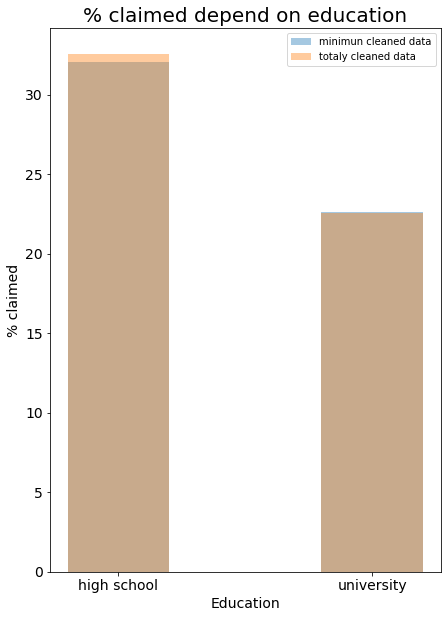

In [153]:
viz_df2 = df.groupby(['EDUCATION'])['OUTCOME'].agg(['count', 'sum'])
viz_df2['ratio'] = viz_df2['sum'] / viz_df2['count'] * 100

viz_df = Car_Insur.groupby(['EDUCATION'])['OUTCOME'].agg(['count', 'sum'])
viz_df['ratio'] = viz_df['sum'] / viz_df['count'] * 100

fig = plt.figure(figsize=(7,10))
plt.title('% claimed depend on education', fontsize=20)
plt.xlabel('Education', fontsize=14)
plt.ylabel('% claimed', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(viz_df2.index.tolist(), viz_df2['ratio'], width=0.4, alpha=0.4, label='minimun cleaned data')
plt.bar(viz_df.index.tolist(), viz_df['ratio'], width=0.4, alpha=0.4, label='totaly cleaned data')
plt.legend()
plt.show()

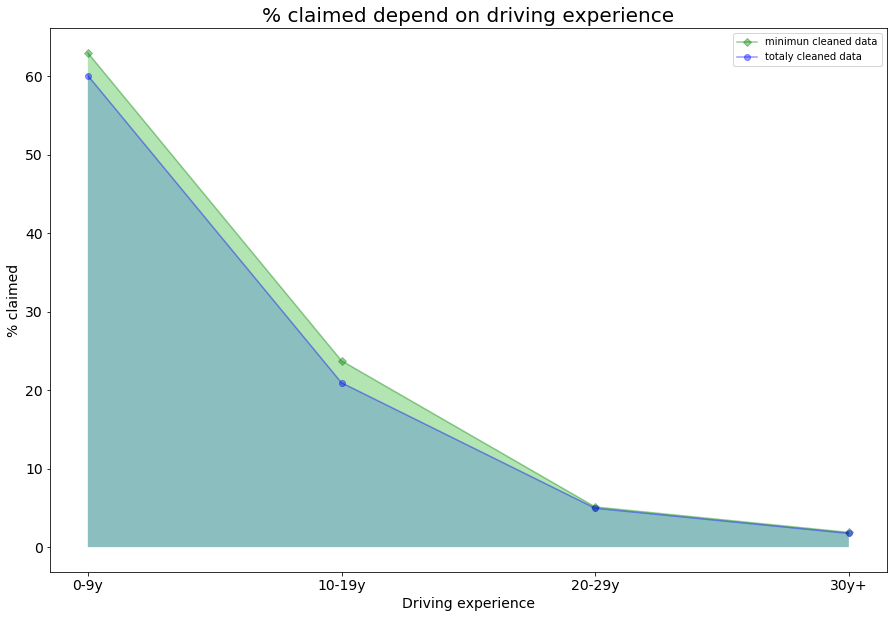

In [152]:
viz_df2 = df.groupby(['DRIVING_EXPERIENCE'])['OUTCOME'].agg(['count', 'sum'])
viz_df2['ratio'] = viz_df2['sum'] / viz_df2['count'] * 100

viz_df = Car_Insur.groupby(['DRIVING_EXPERIENCE'])['OUTCOME'].agg(['count', 'sum'])
viz_df['ratio'] = viz_df['sum'] / viz_df['count'] * 100

fig = plt.figure(figsize=(15,10))
plt.title('% claimed depend on driving experience', fontsize=20)
plt.xlabel('Driving experience', fontsize=14)
plt.ylabel('% claimed', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(viz_df2.index.tolist(), viz_df2['ratio'], 'gD-', alpha=0.4, label='minimun cleaned data')
plt.plot(viz_df.index.tolist(), viz_df['ratio'], 'bo-', alpha=0.4, label='totaly cleaned data')
plt.fill_between(viz_df2.index.tolist(), viz_df2['ratio'], [0]*len(viz_df2),  facecolor='#66cc66', alpha=0.5)
plt.fill_between(viz_df.index.tolist(), viz_df['ratio'], [0]*len(viz_df),  facecolor='#6699cc', alpha=0.5)
plt.legend()
plt.show()

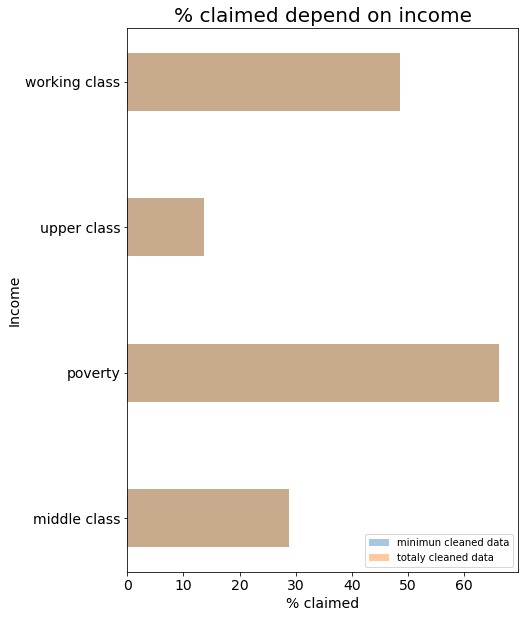

In [148]:
viz_df2 = df.groupby(['INCOME'])['OUTCOME'].agg(['count', 'sum'])
viz_df2['ratio'] = viz_df2['sum'] / viz_df2['count'] * 100

viz_df = Car_Insur.groupby(['INCOME'])['OUTCOME'].agg(['count', 'sum'])
viz_df['ratio'] = viz_df['sum'] / viz_df['count'] * 100

fig = plt.figure(figsize=(7,10))
plt.title('% claimed depend on income', fontsize=20)
plt.ylabel('Income', fontsize=14)
plt.xlabel('% claimed', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.barh(viz_df.index.tolist(), viz_df['ratio'], height=0.4, alpha=0.4, label='minimun cleaned data')
plt.barh(viz_df.index.tolist(), viz_df['ratio'], height=0.4, alpha=0.4, label='totaly cleaned data')
plt.legend()
plt.show()

D:\prog\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\prog\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


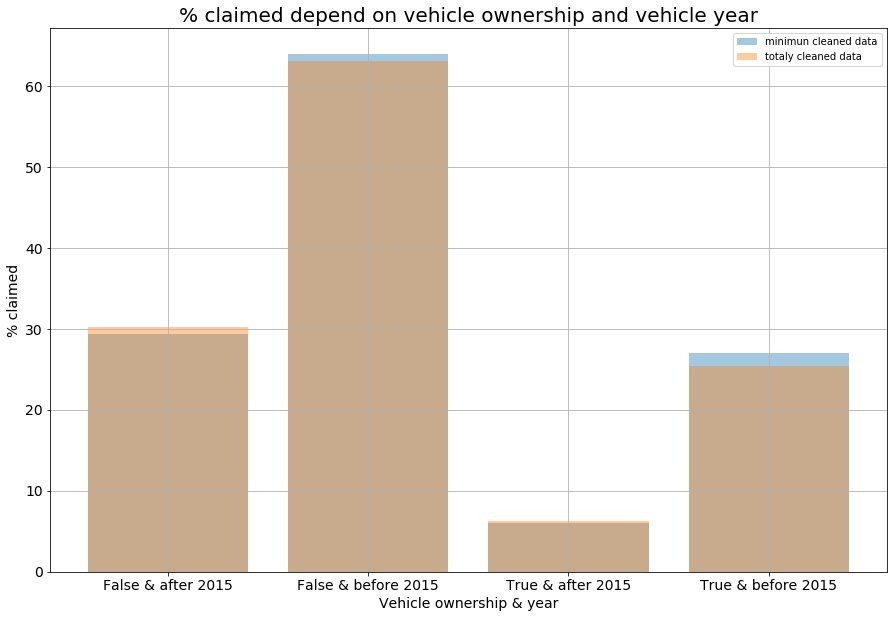

In [147]:
df = df[~df['VEHICLE_OWNERSHIP'].isnull()]
df = df[~df['VEHICLE_YEAR'].isnull()]

df['VEHICLE_OWNERSHIP'] = df['VEHICLE_OWNERSHIP'].astype(float)
df['VEHICLE_OWNERSHIP'] = df['VEHICLE_OWNERSHIP'].apply(float_to_bool)

viz_df2 = df.groupby(['VEHICLE_OWNERSHIP', 'VEHICLE_YEAR'])['OUTCOME'].agg(['count', 'sum'])
viz_df2['ratio'] = viz_df2['sum'] / viz_df2['count'] * 100
viz_df2 = viz_df2.reset_index()
viz_df2['VEHICLE_OWNERSHIP'] = viz_df2['VEHICLE_OWNERSHIP'].astype(str)
viz_df2['VEHICLE_OWNERSHIP_AND_YEAR'] = viz_df2['VEHICLE_OWNERSHIP'] + ' & ' + viz_df2['VEHICLE_YEAR']

viz_df = Car_Insur.groupby(['VEHICLE_OWNERSHIP', 'VEHICLE_YEAR'])['OUTCOME'].agg(['count', 'sum'])
viz_df['ratio'] = viz_df['sum'] / viz_df['count'] * 100
viz_df = viz_df.reset_index()
viz_df['VEHICLE_OWNERSHIP'] = viz_df['VEHICLE_OWNERSHIP'].astype(str)
viz_df['VEHICLE_OWNERSHIP_AND_YEAR'] = viz_df['VEHICLE_OWNERSHIP'] + ' & ' + viz_df['VEHICLE_YEAR']

fig = plt.figure(figsize=(15,10))
plt.title('% claimed depend on vehicle ownership and vehicle year', fontsize=20)
plt.xlabel('Vehicle ownership & year', fontsize=14)
plt.ylabel('% claimed', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.bar(viz_df2['VEHICLE_OWNERSHIP_AND_YEAR'], viz_df2['ratio'], alpha=0.4, label='minimun cleaned data')
plt.bar(viz_df['VEHICLE_OWNERSHIP_AND_YEAR'], viz_df['ratio'], alpha=0.4, label='totaly cleaned data')
plt.legend()
plt.show()

D:\prog\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\prog\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


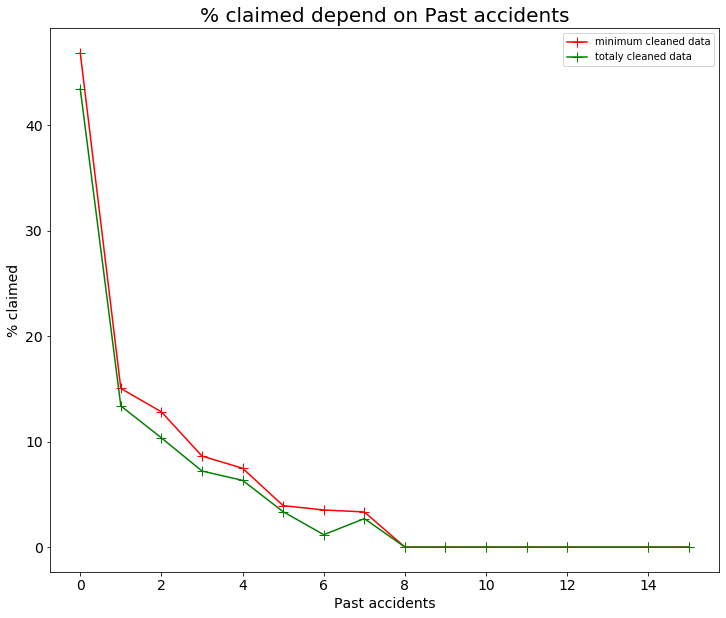

In [85]:
df = df[~df['PAST_ACCIDENTS'].isnull()]

df['PAST_ACCIDENTS'] = df['PAST_ACCIDENTS'].astype(float)
df['PAST_ACCIDENTS'] = df['PAST_ACCIDENTS'].apply(float_to_int)

viz_df2 = df.groupby(['PAST_ACCIDENTS'])['OUTCOME'].agg(['count', 'sum'])
viz_df2['ratio'] = viz_df2['sum'] / viz_df2['count'] * 100

viz_df = Car_Insur.groupby(['PAST_ACCIDENTS'])['OUTCOME'].agg(['count', 'sum'])
viz_df['ratio'] = viz_df['sum'] / viz_df['count'] * 100

fig = plt.figure(figsize=(12,10))
plt.title('% claimed depend on Past accidents', fontsize=20)
plt.xlabel('Past accidents', fontsize=14)
plt.ylabel('% claimed', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(viz_df2.index.tolist(), viz_df2['ratio'], color='red', linestyle='solid', marker='+', ms='10', label="minimum cleaned data")
plt.plot(viz_df.index.tolist(), viz_df['ratio'], color='green', linestyle='solid', marker='+', ms='10', label="totaly cleaned data")
plt.legend()
plt.show()

D:\prog\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


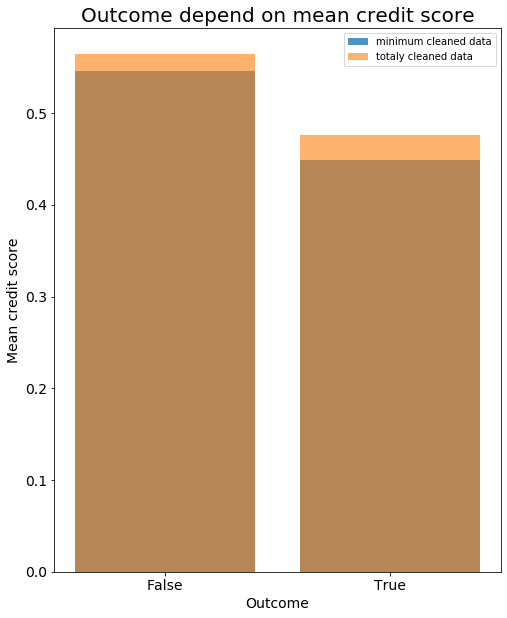

In [95]:
df = df[~df['CREDIT_SCORE'].isnull()]

df['CREDIT_SCORE'] = df['CREDIT_SCORE'].astype(float)

viz_df2 = df.groupby(['OUTCOME'])['CREDIT_SCORE'].mean()

viz_df = Car_Insur.groupby(['OUTCOME'])['CREDIT_SCORE'].mean()

fig = plt.figure(figsize=(8,10))
plt.title('Outcome depend on mean credit score', fontsize=20)
plt.xlabel('Outcome', fontsize=14)
plt.ylabel('Mean credit score', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(viz_df2.index.astype(str).tolist(), viz_df2.values, alpha=0.8, label="minimum cleaned data")
plt.bar(viz_df.index.astype(str).tolist(), viz_df.values, alpha=0.6, label="totaly cleaned data")
plt.legend()
plt.show()

D:\prog\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


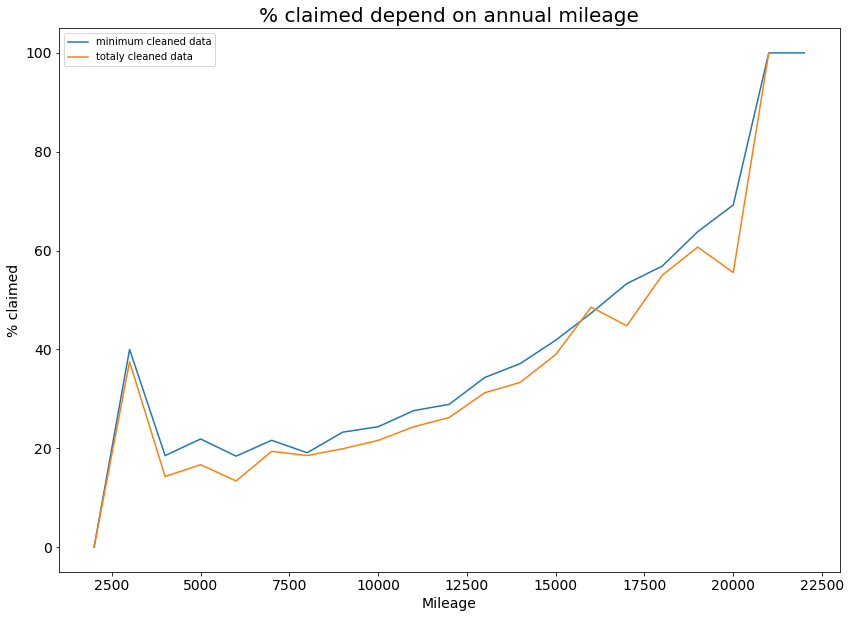

In [130]:
df = df[~df['ANNUAL_MILEAGE'].isnull()]

df['ANNUAL_MILEAGE'] = df['ANNUAL_MILEAGE'].astype(float)

viz_df2 = df.groupby(['ANNUAL_MILEAGE'])['OUTCOME'].agg(['count', 'sum'])
viz_df2['ratio'] = viz_df2['sum'] / viz_df2['count'] * 100

viz_df = Car_Insur.groupby(['ANNUAL_MILEAGE'])['OUTCOME'].agg(['count', 'sum'])
viz_df['ratio'] = viz_df['sum'] / viz_df['count'] * 100

fig = plt.figure(figsize=(14,10))
plt.title('% claimed depend on annual mileage', fontsize=20)
plt.xlabel('Mileage', fontsize=14)
plt.ylabel('% claimed', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(viz_df2.index.tolist(), viz_df2['ratio'], label="minimum cleaned data")
plt.plot(viz_df.index.tolist(), viz_df['ratio'], label="totaly cleaned data")
plt.legend()
plt.show()

D:\prog\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\prog\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


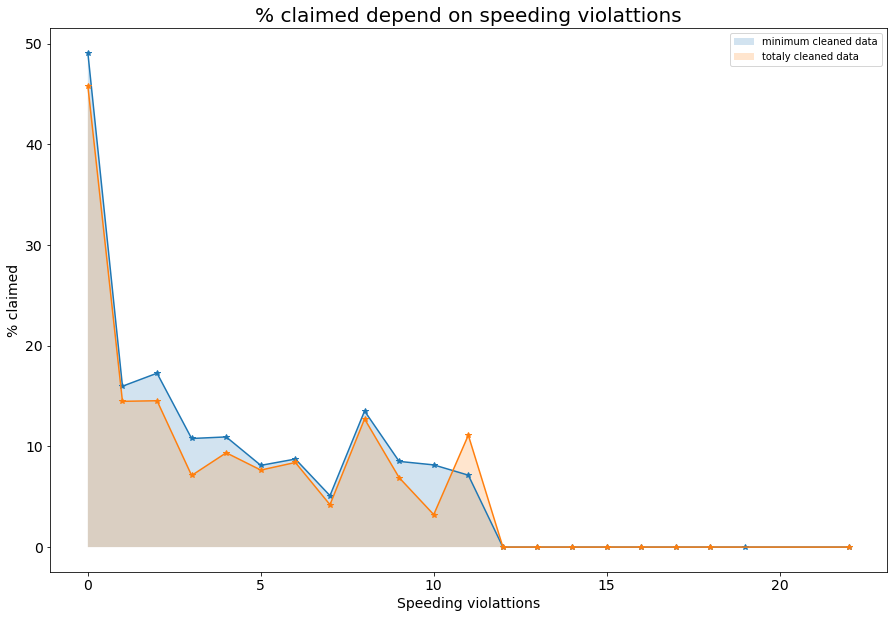

In [134]:
df = df[~df['SPEEDING_VIOLATIONS'].isnull()]

df['SPEEDING_VIOLATIONS'] = df['SPEEDING_VIOLATIONS'].astype(float)
df['SPEEDING_VIOLATIONS'] = df['SPEEDING_VIOLATIONS'].apply(float_to_int)

viz_df2 = df.groupby(['SPEEDING_VIOLATIONS'])['OUTCOME'].agg(['count', 'sum'])
viz_df2['ratio'] = viz_df2['sum'] / viz_df2['count'] * 100

viz_df = Car_Insur.groupby(['SPEEDING_VIOLATIONS'])['OUTCOME'].agg(['count', 'sum'])
viz_df['ratio'] = viz_df['sum'] / viz_df['count'] * 100

fig = plt.figure(figsize=(15,10))
plt.title('% claimed depend on speeding violattions', fontsize=20)
plt.xlabel('Speeding violattions', fontsize=14)
plt.ylabel('% claimed', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(viz_df2.index.tolist(), viz_df2['ratio'], '*-')
plt.plot(viz_df.index.tolist(), viz_df['ratio'], '*-')
plt.fill_between(viz_df2.index.tolist(), viz_df2['ratio'], [0]*len(viz_df2), alpha=0.2, label="minimum cleaned data")
plt.fill_between(viz_df.index.tolist(), viz_df['ratio'], [0]*len(viz_df), alpha=0.2, label="totaly cleaned data")
plt.legend()
plt.show()

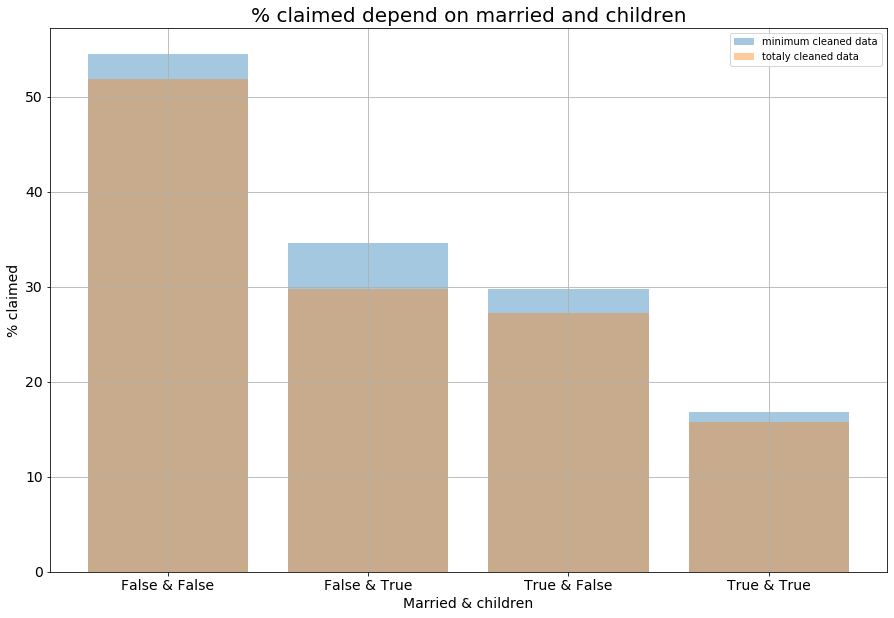

In [140]:
df = df[~df['MARRIED'].isnull()]
df = df[~df['CHILDREN'].isnull()]

df[['MARRIED', 'CHILDREN']] = df[['MARRIED', 'CHILDREN']].astype(float)
df[['MARRIED', 'CHILDREN']] = df[['MARRIED', 'CHILDREN']].applymap(float_to_bool)

viz_df2 = df.groupby(['MARRIED', 'CHILDREN'])['OUTCOME'].agg(['count', 'sum'])
viz_df2['ratio'] = viz_df2['sum'] / viz_df2['count'] * 100
viz_df2 = viz_df2.reset_index()
viz_df2['MARRIED'] = viz_df2['MARRIED'].astype(str)
viz_df2['CHILDREN'] = viz_df2['CHILDREN'].astype(str)
viz_df2['MARRIED_AND_CHILDREN'] = viz_df2['MARRIED'] + ' & ' + viz_df2['CHILDREN']

viz_df = Car_Insur.groupby(['MARRIED', 'CHILDREN'])['OUTCOME'].agg(['count', 'sum'])
viz_df['ratio'] = viz_df['sum'] / viz_df['count'] * 100
viz_df = viz_df.reset_index()
viz_df['MARRIED'] = viz_df['MARRIED'].astype(str)
viz_df['CHILDREN'] = viz_df['CHILDREN'].astype(str)
viz_df['MARRIED_AND_CHILDREN'] = viz_df['MARRIED'] + ' & ' + viz_df['CHILDREN']

fig = plt.figure(figsize=(15,10))
plt.title('% claimed depend on married and children', fontsize=20)
plt.xlabel('Married & children', fontsize=14)
plt.ylabel('% claimed', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.bar(viz_df2['MARRIED_AND_CHILDREN'], viz_df2['ratio'], alpha=0.4, label="minimum cleaned data")
plt.bar(viz_df['MARRIED_AND_CHILDREN'], viz_df['ratio'], alpha=0.4, label="totaly cleaned data")
plt.legend()
plt.show()

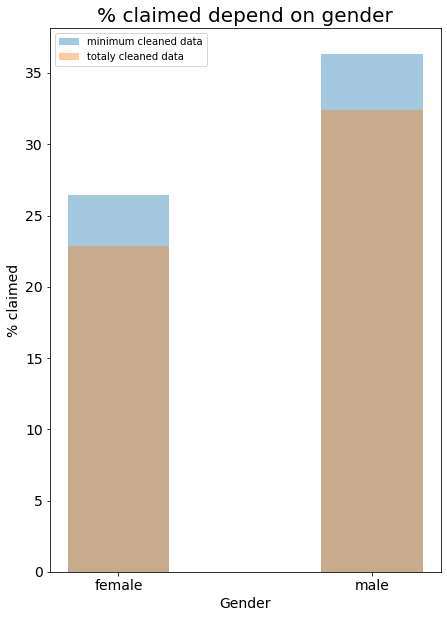

In [143]:
df = df[~df['GENDER'].isnull()]

viz_df2 = df.groupby(['GENDER'])['OUTCOME'].agg(['count', 'sum'])
viz_df2['ratio'] = viz_df2['sum'] / viz_df2['count'] * 100


viz_df = Car_Insur.groupby(['GENDER'])['OUTCOME'].agg(['count', 'sum'])
viz_df['ratio'] = viz_df['sum'] / viz_df['count'] * 100

fig = plt.figure(figsize=(7,10))
plt.title('% claimed depend on gender', fontsize=20)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('% claimed', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(viz_df2.index.tolist(), viz_df2['ratio'], width=0.4, alpha=0.4, label="minimum cleaned data")
plt.bar(viz_df.index.tolist(), viz_df['ratio'], width=0.4, alpha=0.4, label="totaly cleaned data")
plt.legend()
plt.show()

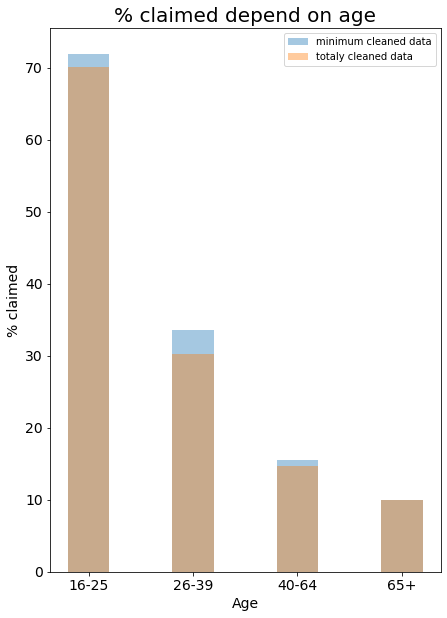

In [144]:
df = df[~df['AGE'].isnull()]

viz_df2 = df.groupby(['AGE'])['OUTCOME'].agg(['count', 'sum'])
viz_df2['ratio'] = viz_df2['sum'] / viz_df2['count'] * 100


viz_df = Car_Insur.groupby(['AGE'])['OUTCOME'].agg(['count', 'sum'])
viz_df['ratio'] = viz_df['sum'] / viz_df['count'] * 100

fig = plt.figure(figsize=(7,10))
plt.title('% claimed depend on age', fontsize=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('% claimed', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(viz_df2.index.tolist(), viz_df2['ratio'], width=0.4, alpha=0.4, label="minimum cleaned data")
plt.bar(viz_df.index.tolist(), viz_df['ratio'], width=0.4, alpha=0.4, label="totaly cleaned data")
plt.legend()
plt.show()

# Conclusions

Примітка: повністю очищені від "None" дані не сильно відрізняються від мінімально можливо очищених даних і показують однакові залежності, тому в висновках розглядаються повністю очищені дані. 

1.  **Освіта:**
    * Люди без вищої освіти на ~10% частіше отримали виплату.

2.  **Досвід водіння:**
    * Зі збільшенням досвіду водіння відсоток страхових виплат зменшується.

3.  **Дохід та соціальний статус:**
    * Вищий дохід і соціальний статус особи корелюють зі зниженням відсотка страхових виплат.

4.  **Право власності та вік автомобіля:**
    * Власники нових автомобілів мають найнижчий відсоток страхових виплат (менше 10%).
    * Водії старих автомобілів, які не є їхніми власниками, мають найвищий відсоток страхових виплат (~60%).
    * Новіші автомобілі та право власності значно зменшують ймовірність страхових виплат.

5.  **Минулі ДТП:**
    * Збільшення кількості ДТП в минулому знижує відсоток страхових виплат.
    * Після 1-го ДТП ймовірність страхової виплати різко зменшується, а після 8 ДТП страхові виплати, як правило, не надаються.

6.  **Кредитний рейтинг:**
    * Страхові виплати в середньому надаються особам з кредитним рейтингом на ~10% нижчим ніж тим кому не надаються.

7.  **Пробіг автомобіля:**
    * Вищий пробіг автомобіля корелює зі збільшенням відсотка страхових виплат.
    * Від ~20% при 7500(+-5000)км до понад 40% при 16000+ км.

8.  **Перевищення швидкості:**
    * Незначна обернена пропорційність між кількістю порушень (1-11) та відсотком виплат.
    * Різке зниження відсотка виплат від 45% (0 порушень) до 15% (1 порушення).
    * Після 11 порушень страхові виплати не надаються.

9.  **Сімейний стан та наявність дітей:**
    * Одружені та особи з дітьми мають найнижчий відсоток страхових виплат.
    * Найвищий відсоток виплат у неодружених осіб без дітей.
    * Одруженість і наявність дітей зменшують шанс виплати

10. **Стать:**
    * Чоловіки отримують відносно більшу кількість страхових виплат, ніж жінки.

11. **Вік:**
    * Вік має значний вплив на відсоток страхових виплат.
    * Найвищий відсоток виплат у віковій групі 16-25 років (~70%).
    * Значне зниження відсотка виплат після 40 років (> 20%).
    

